**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Lab15-HW](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab15/Lab15-TH.ipynb)

___

# <font color=magenta>Exercise Set 15: Matplotlib </font>

**Medrano, Giovanni**

**R11521018**

ENGR 1330 ES-15 - Homework


In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)
! pwd

DESKTOP-6HAS1BN
desktop-6has1bn\medra
C:\Users\medra\anaconda3\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
/c/Users/medra/Desktop/ENGR 1330 Summer 2 Jupyter Files/Lab15


In [2]:
# Import dependencies!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Line Plots

<hr>

## Exercise 1

The table below contains experimental observations.

|Elapsed Time (s)|Speed (m/s)|
|---:|---:|
|0 |0|
|1.01 |3|
|2.07 |7|
|3.3 |12|
|4.2 |20|
|5.3 |30|
|6.1 | 45.6| 

Plot the speed vs time (speed on y-axis, time on x-axis) using a line plot.
From examination of  the plot, estimate the speed at time t = 5.0 (eyeball estimate)

In [15]:
# Create two lists; time  and speed

time = [0,1.01,2.07,3.3,4.2,5.3,6.1]
speed = [0,3,7,12,20,30,45.6]
data = {'Time': time, 'Speed' : speed}
print(data)

{'Time': [0, 1.01, 2.07, 3.3, 4.2, 5.3, 6.1], 'Speed': [0, 3, 7, 12, 20, 30, 45.6]}


   Time  Speed
0  0.00    0.0
1  1.01    3.0
2  2.07    7.0
3  3.30   12.0
4  4.20   20.0
5  5.30   30.0


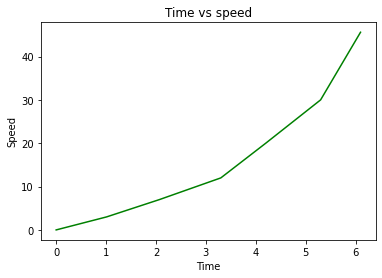

The speed at time t= 5 is 20.0 m/s


In [24]:
# Create a line chart of speed on y axis and time on x axis
df = pd.DataFrame(data)
print(df.head(6))

speed=df['Speed'].tolist()
time=df['Time'].tolist()

plt.xlabel("Time")
plt.title("Time vs speed")
plt.ylabel("Speed")
plt.plot(time,speed ,color='green')
plt.show()

# Estimate:
print('The speed at time t= 5 is', speed[4],'m/s')

<hr>

## Exercise 2
Using the same series from Exercise 1, Plot the speed vs time (speed on y-axis, time on x-axis) using a scatter plot.
From examination of  the plot, estimate the speed at time t = 2.0 (eyeball estimate)

   Time  Speed
0  0.00    0.0
1  1.01    3.0
2  2.07    7.0
3  3.30   12.0
4  4.20   20.0
5  5.30   30.0


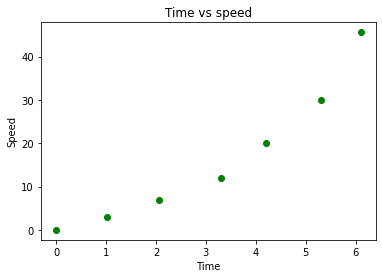

The speed at time t= 2 is 3.0


In [23]:
# Create a scatterplot chart
df = pd.DataFrame(data)
print(df.head(6))

speed=df['Speed'].tolist()
time=df['Time'].tolist()

plt.xlabel("Time")
plt.title("Time vs speed")
plt.ylabel("Speed")
plt.scatter(time,speed ,color='green')
plt.show()

# Estimate: 
print('The speed at time t= 2 is', speed[1],'m/s')

<hr>

## Exercise 3
Using the same series from Exercise 1, Plot the speed vs time (speed on y-axis, time on x-axis) using a line plot. Plot a second line based on the linear model 

$$y = mx + b$$ 

where 

$$b=0~\text{and}~m=7.6$$


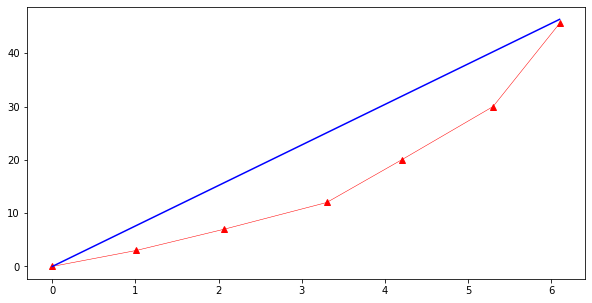

In [25]:
# Code and run your solution here:
def ymodel(xmodel,slope,intercept):
    ymodel = slope*xmodel+intercept
    return(ymodel)

yseries = []
slope = 7.6
intercept = 0.0

for i in range(0,len(time)):
    yseries.append(ymodel(time[i],slope,intercept))
# Create a markers only line chart
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(time, speed, c='red', marker='^',linewidth=0.5) # basic line plot
plt.plot(time, yseries, c='blue') 
plt.show()

<hr>

## Exercise 4
Using trial and error try to improve the 'fit' of the model, by adjusting values of $$m~\text{and}~b$$.

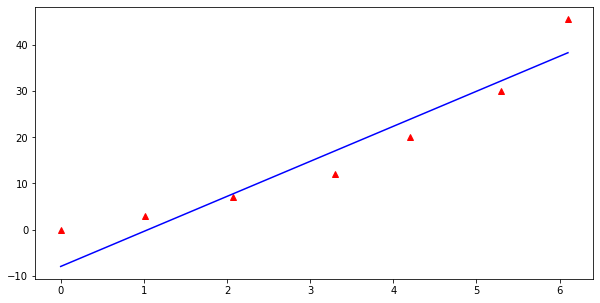

In [26]:
# Code and run your solution here:
yseries = []
slope = 7.6
intercept = -8.0

for i in range(0,len(time)):
    yseries.append(ymodel(time[i],slope,intercept))
# Create a markers only line chart
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(time, speed, c='red', marker='^',linewidth=0) # basic scatter plot
plt.plot(time, yseries, c='blue') 
plt.show()

<hr>

## Exercise 5
Use pandas to read a dataframe from the file `http://54.243.252.9/engr-1330-webroot/8-Labs/Lab15/census_18.csv`.  Then produce a line plot of
the counts by age for the 2010 census, x-axis will be the series `age`, y-axis will be the census values for `2010`.

In [27]:
######### CODE TO AUTOMATICALLY DOWNLOAD THE DATABASE ################
import requests # import needed modules to interact with the internet
# make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url = 'http://54.243.252.9/engr-1330-webroot/8-Labs/Lab15/census_18.csv' # a csv file
response = requests.get(remote_url) # Gets the file contents puts into an object
output = open('census_18.csv', 'wb') # Prepare a destination, local
output.write(response.content) # write contents of object to named local file
output.close() # close the connection

In [29]:
# Code and run your file read here
df = pd.read_csv('census_18.csv')
df.head()

,AGE,2010,2014
0,0,3951330,3949775
1,1,3957888,3949776
2,2,4090862,3959664
3,3,4111920,4007079
4,4,4077551,4005716


<AxesSubplot:xlabel='AGE'>

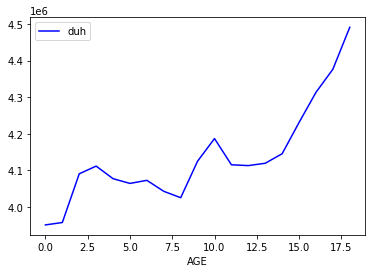

In [30]:
# Code and run your plot here
df.plot.line(x="AGE", y="2010", label="duh", c="blue")



## Exercise 6
Using your dataframe from exercise 5, plot both the 2010 and 2014 census values by age. Plot the 2010 distribution in blue and the 2014 distribution in red.

<AxesSubplot:xlabel='AGE'>

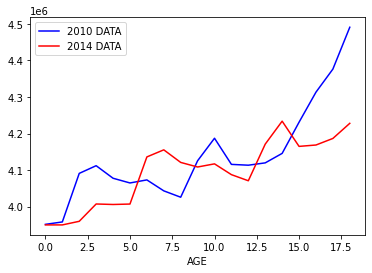

In [31]:
# Code and run your plot here
ax = df.plot.line(x="AGE", y="2010", label="2010 DATA", c="blue") # fill in the parameters
df.plot.line(x="AGE", y="2014", label="2014 DATA", c="red", ax=ax)

---

# Bar Charts

---

## Exercise 7

Consider the data set "data" defined as

    data = {'C':20, 'C++':15, 'Java':30, 'Python':35} 
    
which lists student count by programming language in some school.

Produce a bar chart of number of students in each language, where language is the classification, and student count is the variable.


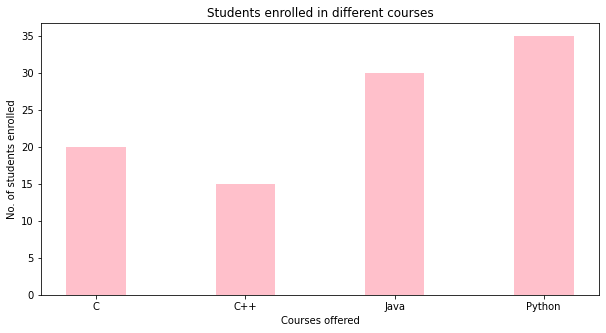

In [33]:
# Code and run your solution here

import numpy as np 
import matplotlib.pyplot as plt  
  
   
# creating the dataset 
data = {'C':20, 'C++':15, 'Java':30,  
        'Python':35} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='pink',  
        width = 0.4) 
  
plt.xlabel("Courses offered") 
plt.ylabel("No. of students enrolled") 
plt.title("Students enrolled in different courses") 
plt.show() 

---

## Exercise 8

Repeat Exercise 7 but use a horizontal bar chart.

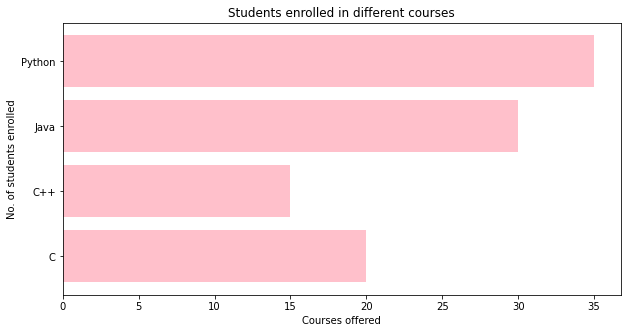

In [36]:
# Code and run your solution here
data = {'C':20, 'C++':15, 'Java':30,  
        'Python':35} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.barh(courses, values, color ='pink') 
  
plt.xlabel("Courses offered") 
plt.ylabel("No. of students enrolled") 
plt.title("Students enrolled in different courses") 
plt.show() 